In [1]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

In [2]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)

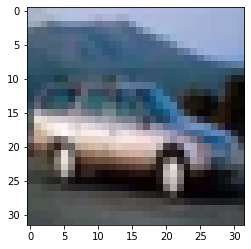

In [5]:
plt.imshow(x_train[4])

## BaseLine

In [6]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
# запуск data augmentation через fit_generator
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 101s 253ms/step - loss: 2.0113 - accuracy: 0.2611 - val_loss: 1.8043 - val_accuracy: 0.3611
Epoch 2/5
391/391 [==============================] - 99s 254ms/step - loss: 1.7532 - accuracy: 0.3631 - val_loss: 1.5976 - val_accuracy: 0.4270
Epoch 3/5
391/391 [==============================] - 100s 256ms/step - loss: 1.6508 - accuracy: 0.4004 - val_loss: 1.4945 - val_accuracy: 0.4549
Epoch 4/5
391/391 [==============================] - 98s 251ms/step - loss: 1.5764 - accuracy: 0.4272 - val_loss: 1.4132 - val_accuracy: 0.4926
Epoch 5/5
391/391 [==============================] - 100s 256ms/step - loss: 1.5170 - accuracy: 0.4506 - val_loss: 1.4194 - val_accuracy: 0.4932


In [9]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 14ms/step - loss: 1.4194 - accuracy: 0.4932
Test loss: 1.419377088546753
Test accuracy: 0.49320000410079956


## Улучшенная сеть

In [10]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', activation='selu', input_shape=x_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
# shape (16,16)

model.add(Conv2D(64, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
# shape (8,8)

model.add(Conv2D(128, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='selu', input_shape=x_train.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
# shape (4,4)

model.add(Conv2D(256, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
# shape (2,2)

model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
# shape (1,1)

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('selu'))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('selu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [11]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=0.5)
batch_size = 128

In [12]:
lr_decayed_fn = keras.optimizers.schedules.CosineDecay(initial_learning_rate=0.001, decay_steps=1000)
opt = keras.optimizers.Adamax(learning_rate=lr_decayed_fn)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/5
391/391 [==============================] - 618s 2s/step - loss: 1.6937 - accuracy: 0.4197 - val_loss: 2.7589 - val_accuracy: 0.2581
Epoch 2/5
391/391 [==============================] - 631s 2s/step - loss: 1.2202 - accuracy: 0.5619 - val_loss: 1.2019 - val_accuracy: 0.5885
Epoch 3/5
391/391 [==============================] - 633s 2s/step - loss: 1.0699 - accuracy: 0.6162 - val_loss: 1.0618 - val_accuracy: 0.6242
Epoch 4/5
391/391 [==============================] - 634s 2s/step - loss: 1.0586 - accuracy: 0.6207 - val_loss: 1.0616 - val_accuracy: 0.6249
Epoch 5/5
391/391 [==============================] - 628s 2s/step - loss: 1.0594 - accuracy: 0.6221 - val_loss: 1.0655 - val_accuracy: 0.6234


In [14]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 17s 53ms/step - loss: 1.0655 - accuracy: 0.6234
Test loss: 1.065549612045288
Test accuracy: 0.6233999729156494


Выводы: 

К увеличению точности привело:
- Изменение Dropout, в базовой модели этот параметр был завышен. 
- Изменение скорости обучения через планировщик так же позволяет более точно обучить модель. 
- Увеличение числа слоёв  даёт возможность сети обучать большее числе паттернов, 
- Увеличение receptive field позволяет анализировать большие объекты. В нашем датасете имеются объекты полностью занимающие картинку я постарался сделать receptive field максимальным.

### Вопрос 2

Опишите в анализе, какие изменения необходимо было бы внести в получившуюся нейронную сеть, если бы ей нужно было работать не с cifar10, а с MNIST, CIFAR100 и IMAGENET

CIFAR100 - полностью аналогичен cifar10, отличается количеством размеченных классов. <br>
Таким образом для обучения полученной нами сети на CIFAR100, необходимо поменять число классов в выходном слое  <br>
>__num_classes = 100<br>
model.add(Dense(num_classes))<br>
model.add(Activation('softmax'))__<br>

С обучением моей сети на MNIST дела немного посложнее<br> 
1. MNIST имеет размерность выборки <br> x_train shape: (60000, 28, 28) поэтому сначала необходимо добавить еще одну ось, чтобы не "ругался" ImageDataGenerator

>__x_train = x_train.reshape(60000,28,28,1)__



2. Размер изображения в датасете 28*28, чтобы модель смогла работать необходимо удалить последний блок с 512 фильтрами.  

>__model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))<br>
 model.add(keras.layers.BatchNormalization())<br>
 model.add(Conv2D(512, (3, 3), padding='same', activation='selu'))<br>
 model.add(keras.layers.BatchNormalization())<br>
 model.add(MaxPooling2D(pool_size=(2, 2)))<br>
 model.add(Dropout(0.1))__<br>


IMAGENET имеет набор изображений различного разрешения, и всегда больше 32*32, таким образом можно воспользоваться например функцией  
>__datagen.flow_from_directory(... target_size=(32, 32) ...)__

flow_from_directory - Принимает путь к каталогу и генерирует пакеты расширенных данных.
target_size - кортеж целых (height, width)чисел, по умолчанию (256,256). Размеры, до которых будут изменены все найденные изображения.
После чего сеть будет обучаться на предоставленных данных

В последнем случае имеет смысл всё-таки воспользоваться уже предобученной сетью на датасете IMAGENET